# Машинное обучение
## Лабораторная работа №3

Выполнил студент группы 15-В-2   
Кукло Кирилл

Вариант №13

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import spearmanr, pearsonr
sns.set_style('whitegrid')


### 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

**Набор данных описывает количество велосипедов взятых на прокат**

| Переменная   | Описание  |
|--------------|--------------|
|instant| Индекс записи |
|dteday| Дата|
|season| Сезон|
|yr| Год|
|mnth| Год|
|holyday| Месяц|
|weekday| День недели|
|workday| Погода в праздник|
|weathersit| Погода|
|temp|Температура|
|atemp|Температура по ощущениям|
|hum| Влажность|
|windspeed| Скорость ветра|
|casual| Количество случайных пользователей|
|register| Количество зарегистрированных пользователей|
|cnt| Количество всех пользователей|


In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [3]:
print('dataset size before reduce: ', df.shape)
df = df.drop_duplicates()
df = df.dropna().reset_index(drop=True)
print('dataset size after reduce: ', df.shape)

dataset size before reduce:  (731, 16)
dataset size after reduce:  (731, 16)


### 3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

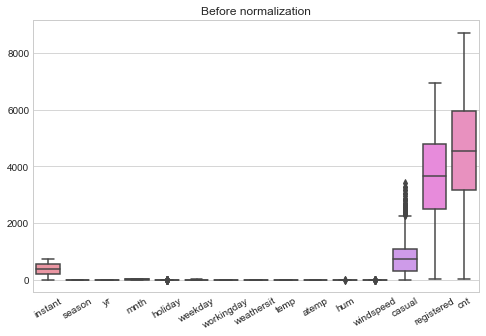

In [4]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']
plt.figure(figsize=(8,5))
sns.boxplot(data=df[numerical_columns])
plt.title("Before normalization")
plt.xticks(rotation=30)
plt.show()

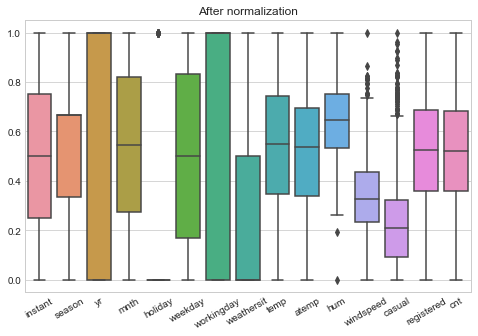

In [5]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
plt.figure(figsize=(8,5))
g = sns.boxplot(data=df[numerical_columns])
plt.title("After normalization")
plt.xticks(rotation=30)
plt.show()

### 4)	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Категориальные признаки отсутствуют

### 5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

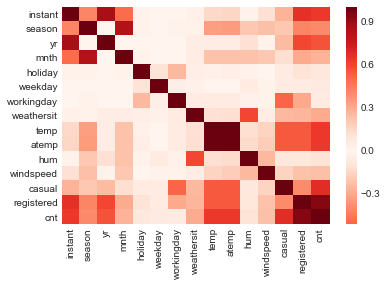

In [6]:
df_corr = df.corr()
colors = sns.color_palette("Reds_r", n_colors=100)
colors += sns.color_palette("Reds", n_colors=100)
sns.heatmap(df_corr, cmap=colors, center=0)
plt.show()

### 6) Заполните пропущенные значения в данных

In [7]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (731, 16)


instant       731
dteday        731
season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
atemp         731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64

### 7)	Решите поставленную задачу регрессии в соответствии с заданием
 * Линейная регрессия без использования регуляризаторов
 * Линейная регрессия, LASSO регуляризатор

In [8]:
X, y = df.drop(['cnt','dteday'], axis=1), df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [9]:
reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)
xt = reg.predict(X_test)

In [10]:
reg.coef_

array([ 0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.])

In [11]:
print(xt[:10]-y_test[:10])

488   -0.226174
421    0.122652
91     0.253462
300    0.081465
177   -0.029097
217    0.018533
269    0.038552
443   -0.195341
543   -0.331329
402    0.009214
Name: cnt, dtype: float64


In [12]:
reg.intercept_

0.51001978560936878

In [13]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
xt = reg.predict(X_test)

In [14]:
reg.coef_

array([  3.21191348e-15,   7.21644966e-16,  -1.33226763e-15,
        -1.87350135e-15,  -4.57966998e-16,   2.08166817e-16,
        -2.22044605e-16,  -5.55111512e-16,   5.55111512e-17,
        -2.35922393e-16,   9.50628465e-16,   3.53883589e-16,
         3.92084676e-01,   7.96824666e-01])

In [15]:
reg.intercept_

-8.8817841970012523e-16

In [16]:
print(xt[:10]-y_test[:10])

488    0.000000e+00
421   -5.551115e-17
91    -2.775558e-16
300    5.551115e-17
177   -4.440892e-16
217   -2.220446e-16
269    1.110223e-16
443   -1.110223e-16
543    2.220446e-16
402    0.000000e+00
Name: cnt, dtype: float64


In [17]:
corr={}
corr['pearson'], pval_pearson = pearsonr(xt,y_test)
corr['spearman'], pval_spearman = spearmanr(xt,y_test)
print('pearson corr: ', corr['pearson'], '\t p-value: ', pval_pearson)
print('spearman corr: ', corr['spearman'], '\t p-value: ', pval_spearman)

pearson corr:  1.0 	 p-value:  0.0
spearman corr:  0.999999436502 	 p-value:  0.0
